# 데이터 수집

In [1]:
import pandas as pd

fish = pd.read_csv("/content/drive/MyDrive/AIML_bum/fish_csv_data.csv")

In [2]:
fish_input = fish[["Weight","Length","Diagonal","Height","Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [3]:
print(fish_input.shape)

(159, 5)


# 데이터 전처리

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [5]:
print(train_input.shape,test_input.shape)

(119, 5) (40, 5)


In [6]:
## data 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
# 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 나눈다.

sub_input, val_input, sub_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

In [8]:
print(train_scaled.shape)

print(sub_input.shape,val_input.shape)

(119, 5)
(95, 5) (24, 5)


# 모델 선정 및 모델 생성

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter = 1000)

# 모델 학습

In [10]:
lr.fit(sub_input, sub_target)

LogisticRegression(C=20, max_iter=1000)

## 교차검증( 학습의 과정중 일부 )

In [11]:
print(lr.score(sub_input, sub_target))
print(lr.score(val_input, val_target))

0.9368421052631579
0.875


# 모델 평가

In [12]:
print(lr.score(test_scaled,test_target))

0.925


# 교차 검증을 적용할 로지스틱 회귀 만들기

In [15]:
lr_cv = LogisticRegression(C=20, max_iter = 1000)
lr_cv.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [16]:
print(lr_cv.score(train_scaled,train_target))
print(lr_cv.score(test_scaled,test_target))

0.9327731092436975
0.925


In [25]:
## 모델 평가 방법 accuracy_score로 모델 성능을 평가할 수 있다.
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train_target, lr.predict(train_scaled))
test_accuracy = accuracy_score(test_target, lr.predict(test_scaled))

print("훈련 정확도:", train_accuracy)
print("테스트 정확도:", test_accuracy) # 맞은 개수 비율
print(111/119)
print(37/40)
# accuracy 맞은 클래스 비율


훈련 정확도: 0.9327731092436975
테스트 정확도: 0.925
0.9327731092436975
0.925


# cv = 3 의 의미

# KFold(n_splits = 3, shuffle = False)

# 교차 검증

In [27]:
from sklearn.model_selection import cross_validate , KFold

splitter = KFold(n_splits=3, shuffle = False)
cv_results = cross_validate(estimator= lr_cv, cv = splitter,
                            X = train_scaled,
                            y = train_target,
                            return_train_score = True)

In [28]:
cv_results

{'fit_time': array([0.07022977, 0.01933622, 0.01895618]),
 'score_time': array([0.00161862, 0.00121617, 0.00123549]),
 'test_score': array([0.975     , 0.875     , 0.82051282]),
 'train_score': array([0.91139241, 0.92405063, 0.95      ])}

In [30]:
print("Cross-Validation Results\n")
print(f"Train_accuracy: {cv_results['train_score'].mean()}\n")
print(f"Test_accuracy: {cv_results['test_score'].mean()}\n")

Cross-Validation Results

Train_accuracy: 0.9284810126582279

Test_accuracy: 0.8901709401709402



## 검증 데이터 분할 시 클래스 불균형을 막기위해서는 데이터 전처리 과정에서 클래스 균형을 잡거나
## 분류의 문제의 경우 분할 시 클래스 불균형을 잡아야 균형 잡힌 학습을 할 수 있다.

## 검증 데이터 분할도 전처리 과정인가? 검증데이터 분할은 데이터 전처리 과정에 포함된다.

In [31]:
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits = 3, shuffle = True, random_state=42)

cv2_results = cross_validate(estimator = lr_cv,
                             cv = splitter,
                             X = train_scaled,
                             y = train_target,
                             return_train_score = True
                             )

In [32]:
cv2_results

{'fit_time': array([0.01633263, 0.01268601, 0.01395082]),
 'score_time': array([0.00102115, 0.00107384, 0.00090623]),
 'test_score': array([0.85      , 0.875     , 0.97435897]),
 'train_score': array([0.93670886, 0.92405063, 0.9125    ])}

In [34]:
print("Stratified Cross-validation Results")
print(f"Train accuracy: {cv2_results['train_score'].mean()}")
print(f"Test accuracy: {cv2_results['test_score'].mean()}")

Stratified Cross-validation Results
Train accuracy: 0.9244198312236288
Test accuracy: 0.8997863247863248


In [36]:
# hyper parameter tunning  GridSearchCV

model = LogisticRegression(max_iter = 1000)
params = {'C' : range(10,200,10)}

In [39]:
from sklearn.model_selection import GridSearchCV
# 교차 검증 전략과 모델 생성
splitter = StratifiedKFold(n_splits = 3, shuffle =True, random_state = 42)
gs = GridSearchCV(
    estimator=model, param_grid = params, n_jobs = 1, cv =splitter
    )

In [40]:
# 모델 훈련
gs.fit(train_scaled, train_target)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=1,
             param_grid={'C': range(10, 200, 10)})

In [42]:
print(gs.best_params_)

print(gs.best_score_)

print(gs.best_index_)

{'C': 150}
0.9583333333333334
14


In [43]:
gs.cv_results_

{'mean_fit_time': array([0.02456911, 0.02473831, 0.03800646, 0.03088911, 0.03521069,
        0.03563682, 0.03259261, 0.03437002, 0.03430414, 0.03297647,
        0.03733333, 0.03298291, 0.03546747, 0.04329387, 0.03464627,
        0.03193394, 0.03550506, 0.04062303, 0.0369633 ]),
 'std_fit_time': array([0.00246241, 0.00178701, 0.01148758, 0.00195518, 0.0037301 ,
        0.00279082, 0.0015635 , 0.00290158, 0.00112399, 0.00152381,
        0.00908833, 0.00404499, 0.00355462, 0.0126521 , 0.00238957,
        0.00276522, 0.00396374, 0.00566428, 0.00493055]),
 'mean_score_time': array([0.0014019 , 0.0036521 , 0.00150704, 0.00146747, 0.00142201,
        0.00184615, 0.00144744, 0.00149941, 0.00145594, 0.00150553,
        0.00291681, 0.00140381, 0.00289273, 0.00135191, 0.00151396,
        0.00140913, 0.00144656, 0.00149846, 0.00158707]),
 'std_score_time': array([9.43754179e-05, 3.15471127e-03, 6.23572843e-05, 5.06237750e-05,
        5.13983616e-05, 4.75758936e-04, 6.04703344e-05, 9.54704920e-05,


In [44]:
best_lr = gs.best_estimator_

In [45]:
# 그리드 서치로 찾아진 최적의 모델 평가

print(best_lr.score(train_scaled,train_target))
print(best_lr.score(test_scaled,test_target))

0.9915966386554622
0.925


In [47]:
# accuracy_score를 이용한 방법
train_accuracy_best = accuracy_score(train_target,best_lr.predict(train_scaled))
test_accuracy_best = accuracy_score(test_target,best_lr.predict(test_scaled))

print(f"Best Parameters from GridSearchCV: {gs.best_estimator_}")
print(f"Train_accuracy: {train_accuracy_best}")
print(f"Test_accuracy: {test_accuracy_best}")

Best Parameters from GridSearchCV: LogisticRegression(C=150, max_iter=1000)
Train_accuracy: 0.9915966386554622
Test_accuracy: 0.925


In [50]:
# 최적의 모델, 모델 파라미터 확인

print(best_lr.coef_,"\n"*2, best_lr.intercept_)

[[ -4.29867481  -3.46897369   6.5690705   14.60614927  -2.07509962]
 [  2.55686841  -2.3659974   -8.69694822  11.43808043  -2.4279204 ]
 [  5.433011    18.22663628 -21.6049691   -8.55939915   5.43616211]
 [ -0.22637453   5.19191105   5.62063514  -5.82552716  -2.78975134]
 [ -0.29107461 -17.64481674  15.33113979  -1.55648537   2.8044275 ]
 [ -5.0537659    5.21569964   4.33664958 -14.43831777  -5.31397629]
 [  1.88001043  -5.15445915  -1.5555777    4.33549975   4.36615803]] 

 [ -1.06861519   1.10994069   4.10748796  -0.02191301   4.46788439
 -12.12895864   3.53417379]


In [ ]:
# 모델 파라미터 개수 ;;

# 클래스의 수는 7개 특성의 수는 5개 로지스틱함수의 소프트 맥스 함수 전단계에서 수행
# 하는 선형결함에 필요한 가중치의 수는 클래스당 5개 필요한 편향의 수는 클래스당 1개 따라서
#5*7 + 1*7

In [65]:
print(best_lr.coef_.shape)
print(best_lr.intercept_.shape)

(7, 5)
(7,)


In [64]:
import numpy as np
print(np.unique(fish_target).shape)

(7,)


# TODO: parameter 특성공학 시도해보기
# CV 결과 visualize 해보기

In [69]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

#데이터 전처리(특성공학)

PF = PolynomialFeatures(degree=5, include_bias= False)
PF.fit(train_input)

train_poly = PF.transform(train_input)
test_poly = PF.transform(test_input)

print(train_poly.shape) # 특성의 수 251( 편향은 제외 ,, 모델에서 알아서 학습하므로 필요 X)

(119, 251)


In [71]:
# 데이터 전처리( 표준화 )
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221 ...  1.85725133  1.2482159
   0.61148567]
 [ 0.30041219  1.54653445  1.45316551 ... -0.51012412 -0.40923942
  -0.26506153]
 [-1.0858536  -1.68646987 -1.70848587 ... -0.75554648 -0.76708485
  -0.70794842]
 [-0.79734143 -0.60880176 -0.67486907 ... -0.67177439 -0.64142179
  -0.54795697]
 [-0.71289885 -0.73062511 -0.70092664 ... -0.6431835  -0.67734095
  -0.64714406]]


In [111]:
lr_pf = LogisticRegression(max_iter = 1000,penalty='l1',solver ='liblinear')
params = { 'C' : range(10,200,10)}
splitter = StratifiedKFold(n_splits = 3, shuffle = True, random_state= 42)

## 모델 생성
gs_pf = GridSearchCV(
    estimator = lr_pf, param_grid = params, cv = splitter, return_train_score = True # 학습데이터에 대한 정확도를 리턴한다, 그러나 교차검증에서 최적의 모델 판단 기준은
    # 검증에이터의 scoroling에 따라 달라진다. 하이퍼 파라미터 최적화에 영향을 주지 않는다.
)


In [112]:
df = pd.DataFrame(train_scaled)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Columns: 251 entries, 0 to 250
dtypes: float64(251)
memory usage: 233.5 KB


In [113]:
## 모델 학습
gs_pf.fit(train_scaled,train_target)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': range(10, 200, 10)}, return_train_score=True)

In [114]:
print(f"{gs_pf.best_params_}")
print(f"{gs_pf.best_score_}")
print(f"{gs_pf.best_index_}")

{'C': 60}
0.9410256410256409
5


In [115]:
gs_pf.cv_results_

{'mean_fit_time': array([0.05764914, 0.08684866, 0.11085447, 0.11477097, 0.13422092,
        0.15189163, 0.15977685, 0.1749262 , 0.18034649, 0.19982624,
        0.19971522, 0.210145  , 0.22137245, 0.2221481 , 0.2488126 ,
        0.36732793, 0.37566543, 0.38556997, 0.36370842]),
 'std_fit_time': array([0.00457761, 0.01107974, 0.01509381, 0.01399393, 0.0125458 ,
        0.02102335, 0.01553239, 0.01607132, 0.01594523, 0.01246247,
        0.01844424, 0.01432498, 0.01119281, 0.00595891, 0.0350887 ,
        0.01986958, 0.00909234, 0.00455727, 0.03233788]),
 'mean_score_time': array([0.00130081, 0.00115824, 0.00128889, 0.00112494, 0.0011607 ,
        0.00112899, 0.00117079, 0.00114449, 0.00111643, 0.00121355,
        0.00119328, 0.00117803, 0.00114918, 0.00116634, 0.00124447,
        0.00183026, 0.00146985, 0.00159359, 0.00165288]),
 'std_score_time': array([2.34452964e-04, 5.47868395e-05, 1.92313910e-04, 1.50062774e-05,
        2.99272040e-05, 9.77483868e-06, 4.96255671e-05, 2.67442409e-05,


In [116]:
best_model = gs_pf.best_estimator_

In [121]:
print(np.sum(best_model.coef_ == 0))
print(best_model.coef_.shape)
7*251

1655
(7, 251)


1757

In [127]:
# 모델 평가

train_accuracy_pf = accuracy_score(train_target,best_model.predict(train_scaled))
test_accuracy_pf = accuracy_score(test_target,best_model.predict(test_scaled)) #target을 줘야 평가하지

print(best_model.score(train_scaled,train_target)
)
print(best_model.score(test_scaled,test_target)
)
print(train_accuracy_pf,test_accuracy_pf)

0.9915966386554622
0.95
0.9915966386554622 0.95


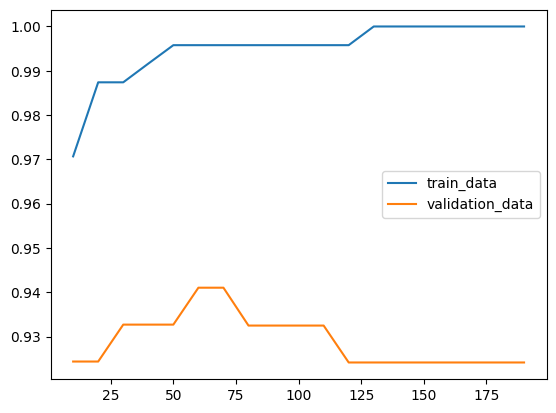

In [134]:
plt.plot(params['C'],gs_pf.cv_results_['mean_train_score'],label = 'train_data')

plt.plot(params['C'],gs_pf.cv_results_['mean_test_score'],label = 'validation_data')
plt.legend()
plt.show()
